# Статистика, основной поток
## Практическое задание 2

В данном задании вы найдете оценки максимального правдоподобия по реальным данным для некоторых вероятностных моделей, посмотрите на некоторые свойства оценок, а также рассмотрите свойства эмпирической функции распределения.

**Правила:**

* Дедлайн **29 октября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[base] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  5 баллов
* Задача 2a -  5 баллов
* Задача 2b -  10 баллов
* Задача 3 -  10 баллов
* Задача 4 -  10 баллов

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

__________________
### Задача 1.

**1.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$

Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.


Для выполнения задания можно использовать следующую функцию:

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF
# help(ECDF)  # В случае затруднений раскомментировать и выполнить

**Решение:**

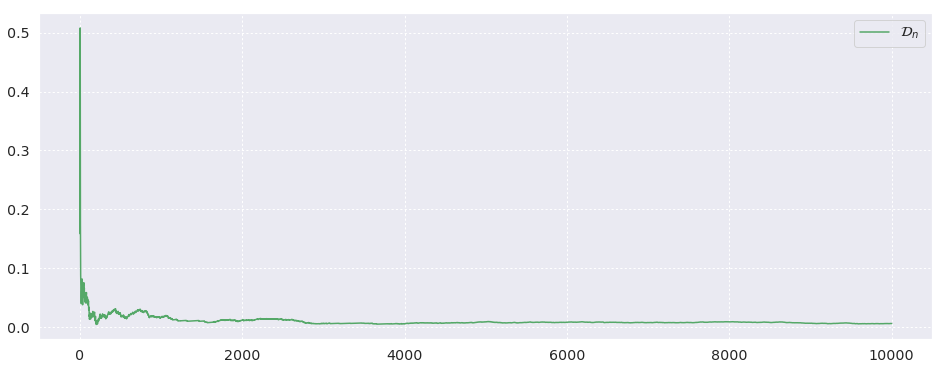

In [3]:
X = sps.norm.rvs(size=10000)
step = np.arange(1, 10001)
Dn = [np.abs(ECDF(X[:i])(step) - sps.norm.cdf(step, loc=0, scale=1)).max() for i in step]
plt.figure(figsize=(16,6))
plt.plot(step, Dn, color='g', label='$\\mathcal{D}_n$')
plt.grid(ls=':')
plt.legend()
plt.show()

**Вывод:**
Из графика видно, что $D_n \to 0$, что соотвествует УЗБЧ, согласно которому $F_n^*(x) - F(x) \to 0$ п.н. при $n \to \infty$

__________________
### Задача 2.
На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенератора сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность:
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k} I (x \geq 0),$$
где $\theta = (k, \lambda)$ &mdash; двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится.  В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

За распределение Вейбулла отвечает класс `weibull_min` из модуля `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

*Выборка:*  Создайте выборку по значениям среднесуточной скорости ветра на некоторой местности для нескольких лет (не менее трех).  Выборку можно получить <a href="http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind_2018.html">отсюда</a>, используя скрипт `script.py`. Откройте командную строку в той же папке, запустите скрипт (`python3 script.py`) и следуйте инструкциям; на вопрос `Pick data type:` надо ответить `5`, чтобы выбрать данные по ветру. В полученном csv-файле надо выбрать данные (столбец `Mean`) за некоторый промежуток времени.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

Двумерную сетку можно создать с помощью функции `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, затем сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать трехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [4]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

**Решение:**

In [5]:
wind_sample = np.array(pd.read_csv('wind.csv')['Mean'][:732])
for i in range(0, 732):
    if np.isnan(wind_sample[i]):
        wind_sample[i] = 0.01

In [6]:
def two_dim_search(grid_1, grid_2):
    mean_pairs = np.hstack([grid_1.reshape(np.prod(grid_1.shape), 1), grid_2.reshape(np.prod(grid_2.shape), 1)])
    likelyhood_weibull_function = map(lambda mas: 
                                           np.sum(sps.weibull_min.logpdf(x=wind_sample,c=mas[0],
                                                                         scale=mas[1])), mean_pairs)
    x, y = cool_argmax(np.array(list(likelyhood_weibull_function)).reshape(grid_1.shape))
    return (grid_1[x, y], grid_2[x, y])

In [7]:
print("max wind speed = ", np.max(wind_sample))

grid_1, grid_2 = np.mgrid[10e-5:12:10e-3, 10e-5:12:10e-3]
cool_c, cool_scale = two_dim_search(grid_1, grid_2)

grid_1, grid_2 = np.mgrid[cool_c - 10e-3:cool_c + 10e-3:10e-5, cool_scale - 10e-3:cool_scale + 10e-3:10e-5]
cool_c, cool_scale = two_dim_search(grid_1, grid_2)

max wind speed =  12.6


In [8]:
print("Result(grid search):", "\nk = ", cool_c, "\nlambda = ", cool_scale)

Result(grid search): 
k =  2.4462 
lambda =  5.2832


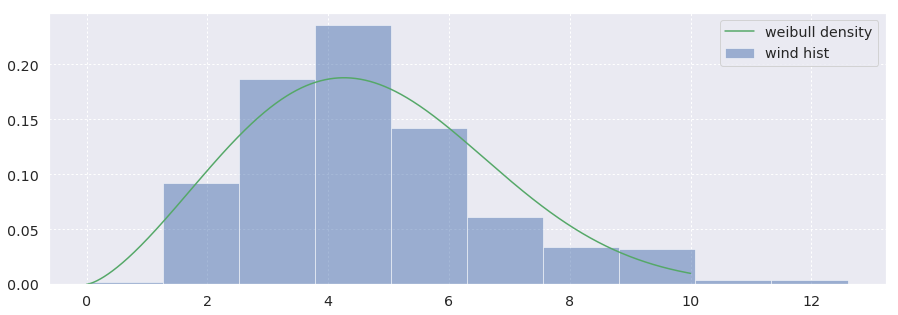

In [9]:
plt.figure(figsize=(15, 5))
grid = np.linspace(0, 10, 1000)
weibull_density = sps.weibull_min(c=cool_c, scale=cool_scale).pdf(x=grid)
plt.hist(wind_sample, bins=10, normed=True, alpha = 0.5, color='b', label='wind hist')
plt.plot(grid, weibull_density, color='g', label='weibull density')
plt.grid(ls=':')
plt.legend()
plt.show()

Гистограмма идентична графику плотности распределения, что подтверждает подчинение распределению Вейбулла значений скорости ветра.

*b).* Обозначим $\widehat{\theta} = \left(\widehat{\lambda}, \widehat{k}\right)$ &mdash; ОМП. Запишите уравнение правдоподобия (все частные производные в точке экстремума логарифмической функции правдоподобия должны быть равны $0$). Используя одно из равенств, можно выразить $\widehat{\lambda}$ через значения $X_1, \dots, X_n, \widehat{k}$; подставив это выражение в другое равенство, получить уравнение на $\widehat{k}$. Решите это уравнение приближенно с помощью метода Ньютона, рассказанного в рамках курса методов оптимизации, и получите $\widehat{k}$, а значит, и $\widehat{\lambda}$.

**Решение:**

Для данного распределения: 
$$ f_{\theta}(\overline{x}) = (\frac{k}{\lambda^k})^n(x_1 \dotsb x_n)^{k - 1}e^{-\sum(\frac{x_i}{\lambda})^k} $$
$$ l_{\theta}(\overline{x}) = n \ln{k} - kn \ln{\lambda} + (k - 1)\sum\ln{x_i} - \sum(\frac{x_i}{\lambda})^k$$
Для частных производных логарифм. функции правдоподобия имеем:
$$ \begin{equation}
 \begin{cases}
       \frac{\mathrm{d} l}{\mathrm{d} k} = \frac{n}{k} - n\ln{\lambda} + \sum\ln{x_i} - \sum(\frac{x_i}{\lambda})^k(\ln{x_i} - \ln{\lambda}) = 0 \\
 \frac{\mathrm{d} l}{\mathrm{d} \lambda} = -\frac{kn}{\lambda} + \frac{k}{\lambda^{k+1}}\sum x_i^k = 0
 \end{cases}
 \end{equation}$$
 Из второго уравнения получаем $$ \lambda = (\frac{\sum x_i^k}{n})^{\frac{1}{k}}$$
 
 Подставив в первое, получаем функцию относительно $k$, которую будем использовать в методе Ньютона:
 $$f(k) = \frac{n}{k} - n\ln{\lambda} + \sum \ln{x_i} - \sum (\frac{x_i}{\lambda})^k (\ln{x_i} - \ln{\lambda})$$
 $$f'(k) = -\frac{n}{k^2} - \sum (\frac{x_i}{\lambda})^k (\ln{x_i} - \ln{\lambda})^2$$

In [14]:
from math import log

def calculate_lambda(k):
    return (np.sum(wind_sample**k)/732)**(1/k)

def f(k, cur_lambda):
    return 732/k - 732*log(cur_lambda) + np.sum(np.log(wind_sample)) -\
(1/(cur_lambda**k))*np.sum((wind_sample**k)*(np.log(wind_sample) - log(cur_lambda)))

def f1(k, cur_lambda):
    return -732/(k**2) - (1/(cur_lambda**k))*np.sum((wind_sample**k)*((np.log(wind_sample) - log(cur_lambda))**2))

acc = 10**(-5)

cur_k = 0
next_k = 1

while abs(cur_k - next_k) > acc:
    cur_k = next_k
    cur_lambda = calculate_lambda(cur_k)
    next_k = cur_k - f(cur_k, cur_lambda)/f1(cur_k, cur_lambda)

print("Result(Newton's method):", "\nk = ", next_k, "\nlambda = ", calculate_lambda(next_k))


Result(Newton's method): 
k =  2.44617254256 
lambda =  5.28320764017


**Вывод:** Из полученных данных можно сделать вывод, что методом Ньютона также можно достаточно точно найти значение параметров распределения. Также он работает намного быстрее, чем поиск по сетке.

__________________
### Задача 3.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $R_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$R_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 
Из семинаров известно, что для $U[0, \theta] \quad p_{X_{(n)}} = n \frac{x^{n-1}}{\theta^n}$ , $\mathsf{E} X_{(n)} = \frac{n}{n+1} \theta$ 

Тогда  $$\textrm{bias}_{\widehat{\theta}}(\theta) = \mathsf{E}_{\theta}cX_{(n)} - \theta = c\mathsf{E}_{\theta}X_{(n)} - \theta = \theta(\frac{cn}{n+1} - 1)$$ 
$$\textrm{var}_{\widehat{\theta}}(\theta) = c^2\mathsf{E}_{\theta} X^2_{(n)} - c^2\mathsf{E}^2_{\theta}X_{(n)} = \frac{c^2n\theta^2}{n+2} - \frac{c^2n^2\theta^2}{(n+1)^2} = \frac{c^2\theta^2n}{(n+2)(n+1)^2}$$


Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое $c$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

Известно, что $\frac{n+1}{n}X_{(n)}$ - несмещенная оценка, $X_{(n)}$ - ОМП 


In [15]:
theta = 1
n = 5
c = np.linspace(0, 5, 1000)
bias_square = ((n/(n+1))*c - 1)**2
var = (n/((n+2)*(n+1)**2))*(c**2)
R = bias_square + var

In [16]:
c_at_min = c[np.argmin(R)]
c_unbiased = (n+1)/n
print('c unbiased = ', c_unbiased)
print('c at min(R) = ', c_at_min)
print('c MLE = 1')

c unbiased =  1.2
c at min(R) =  1.16616616617
c MLE = 1


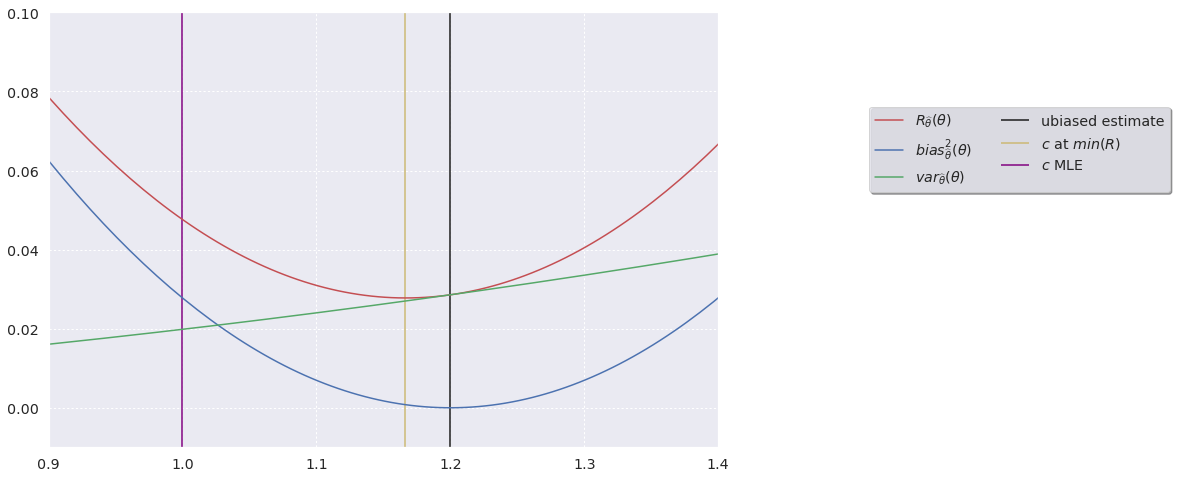

In [17]:
plt.figure(figsize=(12,8))
plt.plot(c, R, color='r', label='$R_{\widehat{\\theta}} (\\theta)$')
plt.plot(c, bias_square, color='b', label='$bias^2_{\widehat{\\theta}}(\\theta)$')
plt.plot(c, var, color='g', label='$var_{\widehat{\\theta}} (\\theta)$')
plt.ylim((-0.01, 0.1))
plt.xlim((0.9, 1.4))
plt.vlines(c_unbiased, -0.01, 0.1, color='k', label='ubiased estimate')
plt.vlines(c_at_min, -0.01, 0.1, color='y', label='$c$ at $min(R)$')
plt.vlines(1, -0.01, 0.1, color='purple', label='$c$ MLE')
plt.grid(ls=':')
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=2)
plt.show()

**Вывод: ** $c$ несмещенной оценки не дает минимум функции риска, так как, хоть и $\textrm{bias}$-слагаемое для нее всегда 0 (прямо следует из определения несмещенной оценки), ее $\textrm{var}$-слагаемое не минимально. И минимум функции риска дает $c$ смещенной оценки параметра, которое ближе к $c$ несмещенной оценки, чем к ОМП.

__________________
### Задача 4.
Рассмотрим распределение Коши с параметром сдвига $\theta$, обладающего плотностью $p_{\theta}(x) = \frac{1}{\pi (1 + \left(x- \theta\right)^2)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

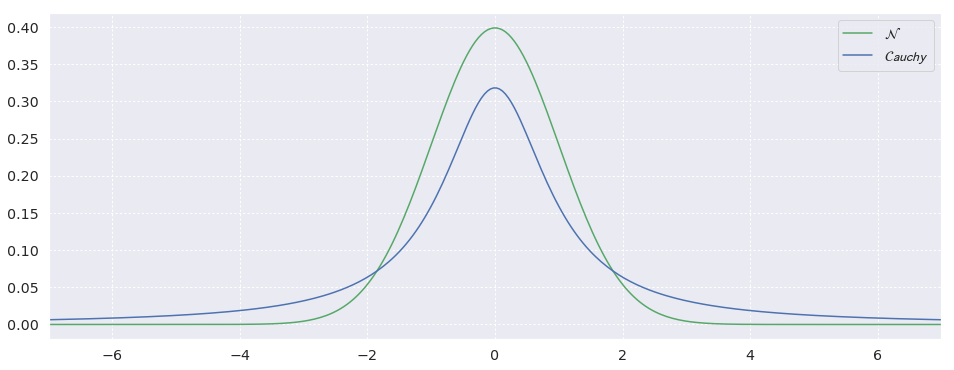

In [18]:
plt.figure(figsize=(16,6))
grid = np.linspace(-7, 7, 300)
plt.plot(grid, sps.norm.pdf(grid), color='g', label='$\\mathcal{N}$')
plt.plot(grid, sps.cauchy.pdf(grid), color='b', label='$\\mathcal{Cauchy}$')
plt.legend()
plt.grid(ls=':')
plt.xlim((-7, 7))
plt.show()

**Вывод:** Из графика видно, что распределение Коши имеет больший разброс, чем нормальное (график плотности медленнее стремится к 0).

**2.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения выборочного среднего $\overline{X}$ и выборочной медианы  $\widehat{\mu}$.

На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

**Решение: **

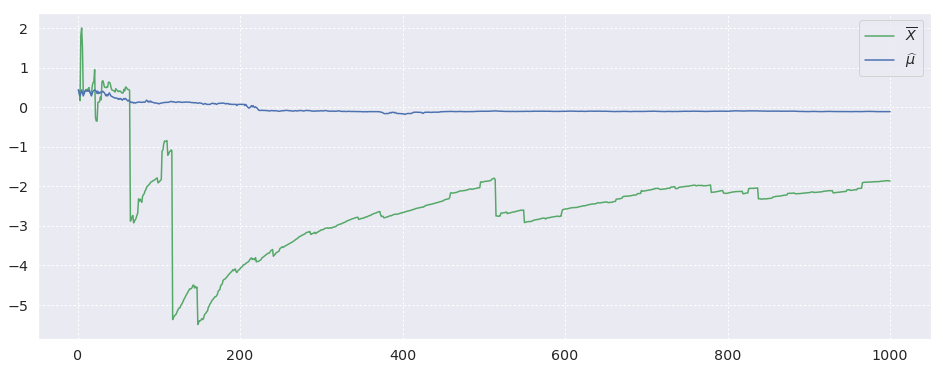

In [19]:
X = sps.cauchy.rvs(size=1000)
grid = np.arange(1, 1001)

X_MEAN = np.cumsum(X) / grid
MEDIAN = [np.median(X[:i]) for i in grid]

plt.figure(figsize=(16,6))
plt.plot(grid, X_MEAN, color='g', label='$\overline{X}$')
plt.plot(grid, MEDIAN, color='b', label='$\widehat{\mu}$')
plt.grid(ls=':')
plt.legend()
plt.show()

**Вывод:** Для оценки параметра распределения Коши не стоит брать выборочное среднее, так как оно сильно реагирует на разброс, удобнее взять выборочную медиану. Полученный вывод хорошо иллюстрирует график.